Dataset: 
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
    
    
This dataset was created to have several amount information from a college about students in various courses like farming, design, teaching, nursing, reporting, business, social work, and tech. This info includes what we know about students when they join college (their school background, where they come from, and their money situation) and how well they did in their first and second semesters. We're using this data to make a system that can guess if a student will drop out, do really well, or be somewhere in between, but there are a lot more students in one of these groups than the others.


Techniques and Algothrims:
Random Forest: The Random Forest classifier uses multiple decision trees and uses random samples of the data for each tree. This would help prevent the trees from becoming overly similar and overfitting the data. This means that it will be more accurate and precise at classifying our data. Random Forest classifier is a supervised learning training model in which the training data includes labeled examples. These labels provide the algorithm with the desired output for each data point. The algorithm learns the relationship between the input features and the labels, and uses this knowledge to predict labels for new, unseen data.

K-Means Clustering: K-means sorts data points into groups (clusters) based on how similar they are to each other. This similarity is typically determined by distance metrics. We used the elbow method in order to determine how many k-clusters we need the data to be divided into. This training model is unsupervised which means that it doesn't require labeled data. You provide the data points, and the algorithm finds the clusters.

Linear Regression: Linear regression assumes a linear relationship between variables. In this case, the relationship between factors like application mode or marital status and student outcomes (dropout/graduation) might not be perfectly linear. However, if the dataset was modified slightly, we could explore linear regression. For example we create a new target variable: Instead of dropout/enrolled/graduate, imagine a new variable is created that represents the number of credits a student completes in their first year. Independent Variables: We could include factors that might influence credits completed, such as: Hours studied per week, High school GPA, and Application order. With this modification, we could use linear regression to model the relationship between these factors and the number of credits completed in the first year. The model would estimate a linear equation to predict the expected number of credits a new student might complete based on their application order, GPA, and study habits.

Gradient Boosting: Gradient Boosting uses the prediction from multiple weaker models to create a single, but stronger prediction model. For the weaker models, we used decision trees for simple models based on a series of yes or no questions, or categorical questions. Since it uses weaker models as its training data, it is a supervised training technique.

K-Nearest Neighbors Classification: K-nearest neighbors categorizes new data points based on their similarity to existing labeled data points. The algorithm identifies the k nearest neighbors in the training set to the new data point. The new data point is then assigned the most frequent class label among these k nearest neighbors. So basically, the new point is categorized based on the "majority vote" of its closest neighbors. Since it relies on training data that has labels or variables, it is also a supervised learning training model.

Decision Trees: The decision tree is trained on a dataset with labeled examples. These labels represent the desired outcome you want to predict. They mimic human decision-making by learning a series of yes-or-no questions that ultimately lead to a classification or prediction. Decision trees is a supervised learning training model in which the training data includes labeled examples. These labels provide the algorithm with the desired output for each data point. The algorithm learns the relationship between the input features and the labels, and uses this knowledge to predict labels for new, unseen data.

In [25]:
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_excel("C:/Winter2024/105/data.xlsx")

In [26]:


#only keeping course, nationality, age, gender and grade @ 1st semester
cols_to_keep = ["Course", "Nacionality", "Gender", "Age at enrollment",
                "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)",
                "Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"]

df_selected = df[cols_to_keep].copy()

print("Shape: ", df_selected.shape)
df_selected.head()

Shape:  (4424, 8)


,Course,Nacionality,Gender,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled)
0,171,1,1,20,0.000000,0.000000,0,0
1,9254,1,1,19,14.000000,13.666667,6,6
2,9070,1,1,19,0.000000,0.000000,6,6
3,9773,1,0,20,13.428571,12.400000,6,6
4,8014,1,0,45,12.333333,13.000000,6,6


In [27]:
#take out people who dropped out
df_selected['Curricular_units_1st_sem_(grade)'] = df_selected['Curricular units 1st sem (grade)'].astype(str)
df_selected['Curricular_units_2nd_sem_(grade)'] = df_selected['Curricular units 2nd sem (grade)'].astype(str)

df_analysis = df_selected[
    (df_selected['Curricular_units_1st_sem_(grade)'] != "0.0") &
    (df_selected['Curricular_units_2nd_sem_(grade)'] != "0.0")
    ].copy()

df_analysis.rename(columns={
    'Curricular units 1st sem (grade)': 'Semester1Grade',
    'Curricular units 2nd sem (grade)': 'Semester2Grade',
    'Age at enrollment': 'Age'
    }, inplace=True)

#making sure that observations are taken out
num_variables = df.shape[1]
num_observations = df.shape[0]

num_variables_analysis = df_analysis.shape[1]
num_observations_analysis = df_analysis.shape[0]

print("df:")
print(f"Number of Variables: {num_variables}")
print(f"Number of Observations: {num_observations}")

print("\ndf_analysis:")
print(f"Number of Variables: {num_variables_analysis}")
print(f"Number of Observations: {num_observations_analysis}")

print(df_analysis.dtypes)

df:
Number of Variables: 37
Number of Observations: 4424

df_analysis:
Number of Variables: 10
Number of Observations: 3512
Course                                   int64
Nacionality                              int64
Gender                                   int64
Age                                      int64
Semester1Grade                         float64
Semester2Grade                         float64
Curricular units 1st sem (enrolled)      int64
Curricular units 2nd sem (enrolled)      int64
Curricular_units_1st_sem_(grade)        object
Curricular_units_2nd_sem_(grade)        object
dtype: object


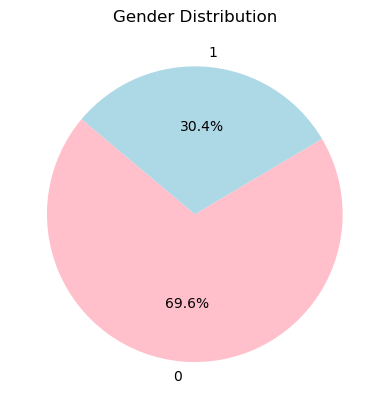

In [28]:
# plot gender 1 = male (blue) , 0 = female (pink)
Gender = df_analysis['Gender'].value_counts()
y = np.array(Gender)
plt.pie(y, labels=Gender.index, autopct='%1.1f%%', startangle=140, colors= ["pink","#ADD8E6"])
plt.title('Gender Distribution')
plt.show()

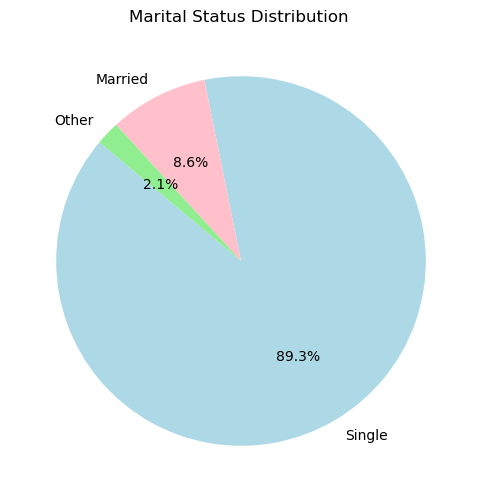

In [29]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("C:/Winter2024/105/data.xlsx")

# Ensure 'Marital status' column is treated as a category
df['Marital status'] = pd.Categorical(df['Marital status'])

# Calculate the percentages and filter out any category that makes up less than 1% of the total
marital_status_percentages = df['Marital status'].value_counts(normalize=True, dropna=True) * 100
marital_status_filtered = marital_status_percentages[marital_status_percentages > 1]

# Prepare the labels for the pie chart, corresponding to the filtered categories
labels_filtered = {1: 'Single', 2: 'Married', 3: 'Other'}  # Assuming these are the only relevant categories
labels_to_use = [labels_filtered.get(key, 'Other') for key in marital_status_filtered.index]

# Generate the pie chart with the filtered values and labels
plt.figure(figsize=(8, 6))
plt.pie(marital_status_filtered, labels=labels_to_use, autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '', startangle=140, colors=["#ADD8E6", "pink", "lightgreen"])
plt.title('Marital Status Distribution ')
plt.show()


According to the pie chart 89.3% are single, 8.6% of the sample are married and 2.1% from the dataset are other. 

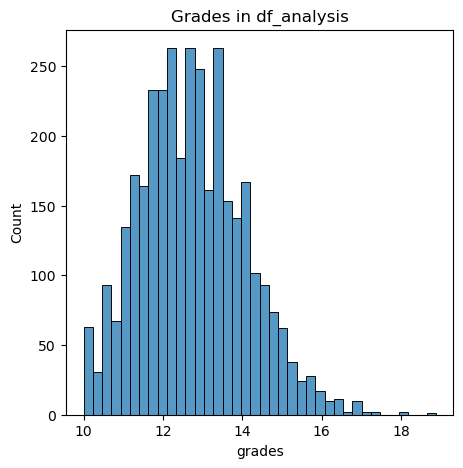

In [30]:
#plot semester 1 grades
plt.figure(figsize=(5, 5))
sns.histplot(x='Semester1Grade', data=df_analysis)
plt.title('Grades in df_analysis')
plt.xlabel('grades')
plt.ylabel('Count')
plt.show()

This bar graph helps us visualize the grades of the students. We see that most students fall under the 12 -14 range. In the leftmost part of the graph(around 10) we see a lot more students as compared to the rightmost part of the graph(around 18), which seem to be the outliers of the group.

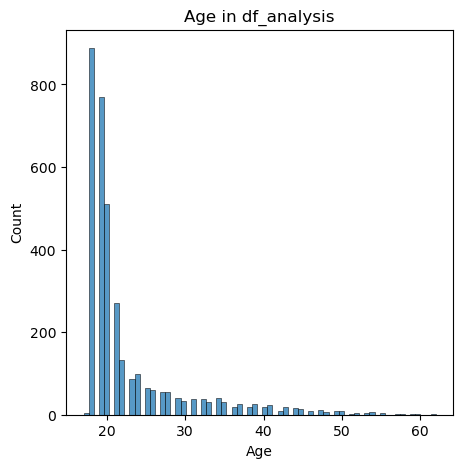

In [31]:
#plot age
plt.figure(figsize=(5, 5))
sns.histplot(x='Age', data=df_analysis)
plt.title('Age in df_analysis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This bar graph helps us visualize how many students of each age there are. We see that most students are aged 18-21. Most students are 18 when they enroll in college, but we see the number of students enrolled decrease as their age increases.

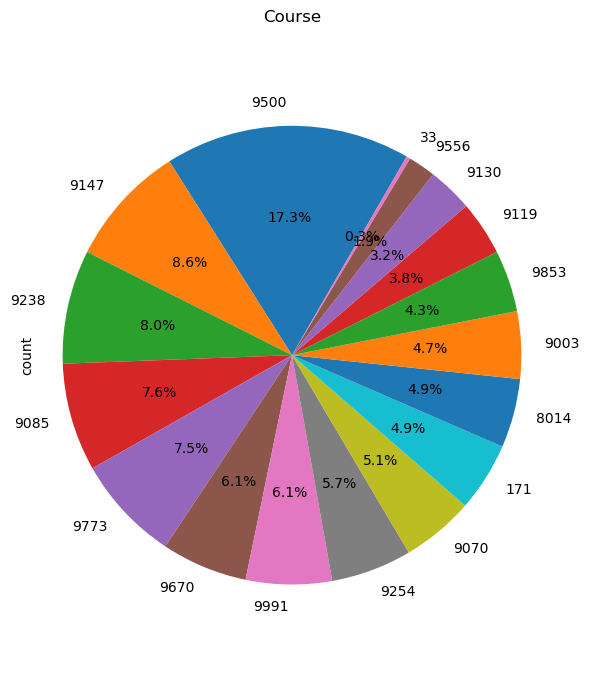

In [33]:
# plot the course frequency
courses = df['Course'].value_counts()

plt.figure(figsize=(6, 7))
courses.plot(kind='pie', autopct='%1.1f%%', startangle=60)
plt.title('Course')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

This pie chart helps us visualize the distribution of student in each class. For example, we see that most students take class 9500(17.3%) as compared to the other classes available. The least amount of students take class 33(0.3%).

<Figure size 1200x600 with 0 Axes>

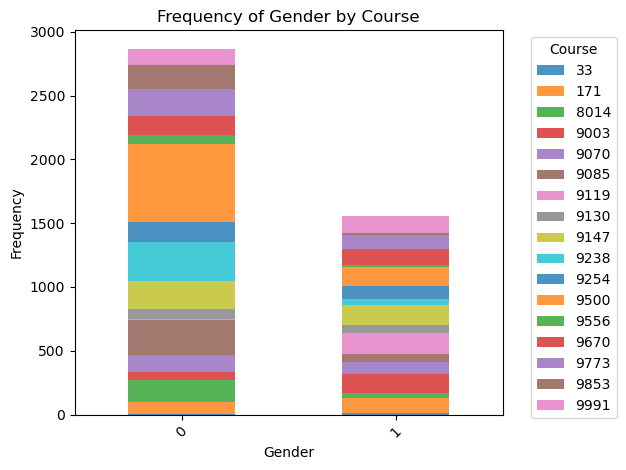

In [41]:
gender = df['Gender']
course = df['Course']

gender_course_count = df.groupby(['Gender', 'Course']).size().unstack()

plt.figure(figsize=(12, 6))
gender_course_count.plot(kind='bar', stacked=True, alpha=0.8)
plt.title('Frequency of Gender by Course')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on this stacked bar graph, we see that females(0) and males(1) usually differ on the classes they take. Usually the classes are either dominated by males or females. For example, in class 9500, there are way more females than males. In another instance we see that the are only females in class 9853 and no males.

C:\Users\latha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\latha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\latha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\latha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

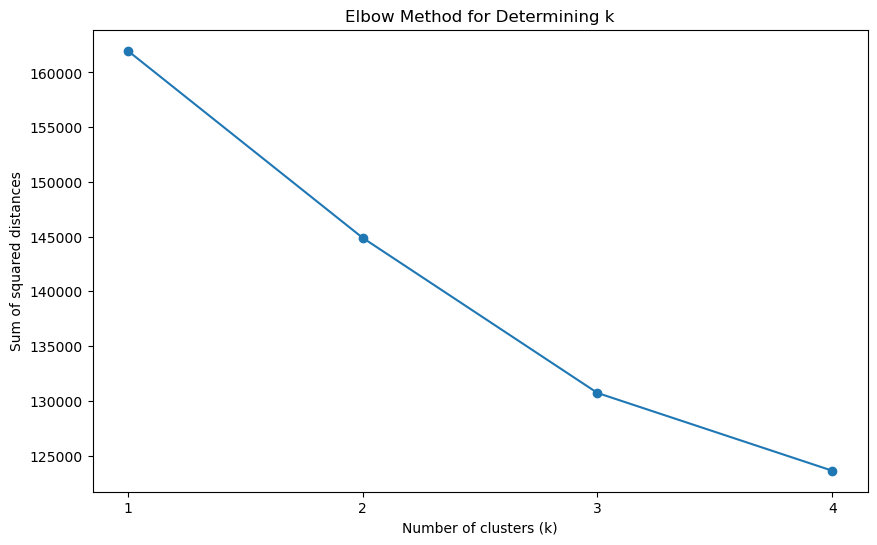

In [40]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


# Load the dataset

# Load the dataset
df = pd.read_excel("C:/Winter2024/105/data.xlsx")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()



preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


X_cluster = preprocessor.fit_transform(df)

# Elbow method
sse = {}
for k in range(1, 5):  
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_cluster)
    sse[k] = kmeans.inertia_  


plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Determining k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.xticks(list(sse.keys()))
plt.show()


According to the plot, we can see that choosing k=3 is the best choice as increasing the number of clusters beyond 3 doesn't lead to a better fitting of the model. 

C:\Users\latha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\latha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


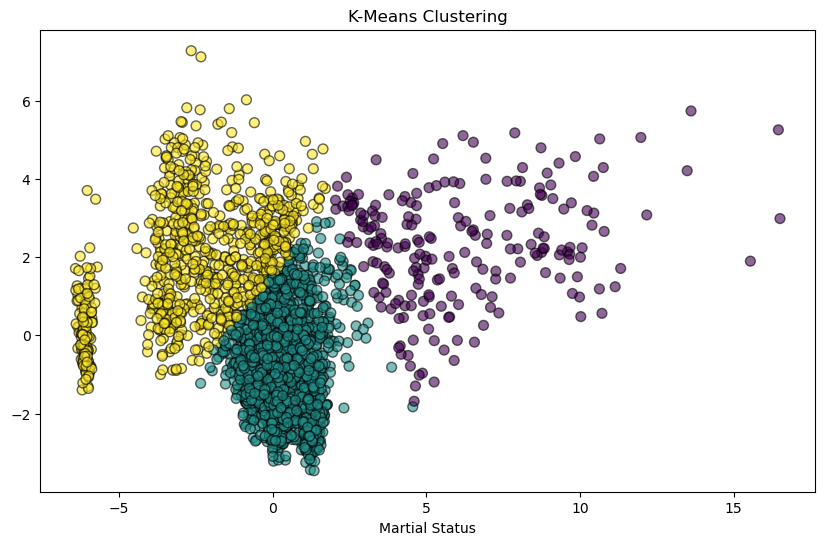

NameError: name 'rf_accuracy' is not defined

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_excel("C:/Winter2024/105/data.xlsx")

#  'Target' column is what we're predicting - convert it to binary (1 for Graduate, 0 for Dropout)
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'Graduate' else 0)

X = df.select_dtypes(include='number').drop(columns=['Target'])
y = df['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#  unsupervised learning: K-Means Clustering
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)
clusters = kmeans.predict(X_train_pca)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Martial Status')
plt.show()

(rf_accuracy, rf_report)


The first cluster(green) represents students with high academic engagement. They are heavily involved in their coursework, as suggested by their high number of enrollments and approvals in curricular units. This group could potentially correlate with higher academic success and lower dropout rates.

The second cluster(yellow) appears to show students with specific demographic and enrollment traits. These could be non-traditional students who might have different needs and challenges affecting their academic outcomes, potentially leading to a varied success rate.

The third cluster(purple) has fewer distinct characteristics and might represent a more generalized student group without extreme values in the features considered.

Overall, the clustering provides insight into how academic and personal factors may cluster together. This suggests specific ways we can help different groups of students based on their needs. For instance, the cluster characterized by high academic engagement(yellow cluster) may benefit from continued support to maintain their performance, on the other hand the cluster with distinct demographic characteristics (purple cluster) might need tailored support services to address their unique challenges.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load the data
df = pd.read_excel("C:/Winter2024/105/data.xlsx")

df['Target'] = df['Target'].map({'Graduate': 1, 'Dropout': 0})


df_clean = df.dropna(subset=['Target'])

# Define categorical and numerical features
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Target')  # Remove the target variable

# Define the features and target
X = df_clean[numerical_cols + categorical_cols]
y = df_clean['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a logistic regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate and print the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9104683195592287
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       277
         1.0       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



The results from the logistic regression model show that it performs well in predicting student outcomes with an overall accuracy of 91%. This means that in 91% of cases, the model correctly identified whether students would graduate or drop out.

The precision score for predicting dropouts (class 0.0) is 92%. This means that when the model predicts a student will drop out, it is correct 92% of the time. For predicting graduates (class 1.0), the precision is slightly lower at 91%. This indicates that 91% of the time the model is correct when it predicts a student will graduate.

The recall score for dropouts is 84%, indicating that the model successfully identifies 84% of the actual dropout cases. For graduates, the recall is higher at 95%, meaning the model identifies 95% of the actual graduates correctly.

The F1-score is the weighted average of precision and recall. The F1-score for predicting dropouts is 88%, and for graduates, it is 93%. These F1-scores suggest that the model has a good balance between precision and recall for both cases, with a strong performance in predicting graduates.

The model is strong, with high scores across all metrics, but it performs slightly better at identifying graduates than dropouts. 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

X = df.drop('Target', axis=1)  
y = df['Target']  

df_clean = df.dropna(subset=['Target'])

X = df_clean.drop('Target', axis=1)  
y = df_clean['Target']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), 
                                ('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_rep_rf)


Accuracy: 0.9022038567493113
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       277
         1.0       0.90      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



Accuracy: The model has an accuracy of about 90.2%. This suggests that it correctly predicts the student's outcome (graduate or dropout) in most cases.

Precision: For predicting dropouts (class '0.0'): The precision is 91%, which means that among all the students predicted as dropouts, 91% actually did drop out. For predicting graduates (class '1.0'): The precision is 90%. This means among all the students predicted as graduates, 90% actually did graduate.

Recall: For dropouts: The recall is 83%, this means out of all the actual dropouts, the model predicts 83% correctly. For graduates: The recall is higher at 95%, indicating that the model is quite good at identifying students who will graduate.

F1-Score: For dropouts: An F1-score of 87% suggests a good balance between precision and recall for predicting dropouts. For graduates: An F1-score of 92% suggests that the balance is better for predicting graduates.

The model's performance is strong overall. The higher recall for graduates suggests that the model could be useful for identifying students at risk of not graduating, this can allow a school to provide more support to help particular students out.